In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold



In [9]:
# read dataframe
combined = pd.read_pickle('../combined')

# Train a SVM model 

In [13]:
# remove NaN in output antibiotics
def noNullAntibiotics(antibiotics):
    df = combined.loc[pd.isnull(combined[antibiotics + '_ris']) == 0]
    return df
# plot_learning_curve from sklearn examples
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    #return plt

# a simple svm
def trainSVM(df, antibiotics):
    # split test, train
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :406], df[antibiotics + '_ris'], test_size=0.8, random_state=0)
    
    # choose estimator (our model)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    # cross validation
    skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
    cv = skf.split(X_train, y_train)
   
    # tune hyperparameters
    gammas = np.logspace(-6, -1, 10)
    classifier = GridSearchCV(estimator=clf, cv=cv, param_grid=dict(gamma=gammas))
    classifier.fit(X_train.values, np.asarray(y_train))
    
    # plot learning curve
    title = antibiotics +' Learning Curves (SVM, linear kernel, $\gamma=%.6f$)' %classifier.best_estimator_.gamma
    estimator = svm.SVC(kernel='linear', gamma=classifier.best_estimator_.gamma) #put the best parameters in
    plot_learning_curve(estimator, title, X_train.values, np.asarray(y_train), cv=skf)
    plt.show()
    # final evaluation with out test set
    print('classifier score', classifier.score(X_test, y_test))
    

# combine everything
def antiToSVM(antibiotics):
    df = noNullAntibiotics(antibiotics)
    trainSVM(df, antibiotics)
    

/home/hermuba/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/hermuba/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


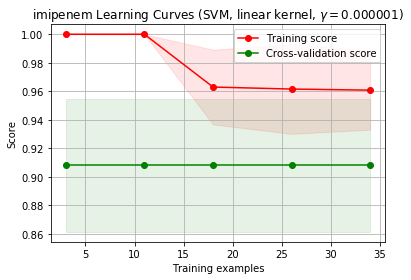

classifier score 0.897674418605


In [14]:
antiToSVM('imipenem')

In [22]:
combined['imipenem_ris'].value_counts()

R     149
S     114
I       5
Name: imipenem_ris, dtype: int64

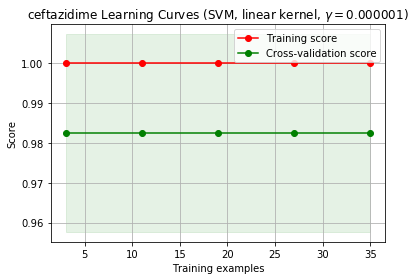

classifier score 0.926605504587


In [16]:
antiToSVM('ceftazidime')

/home/hermuba/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/hermuba/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


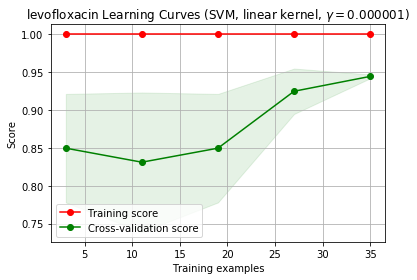

classifier score 0.916666666667


In [17]:
antiToSVM('levofloxacin')

In [23]:
combined['levofloxacin_ris'].value_counts()

R     156
S     111
I       3
Name: levofloxacin_ris, dtype: int64

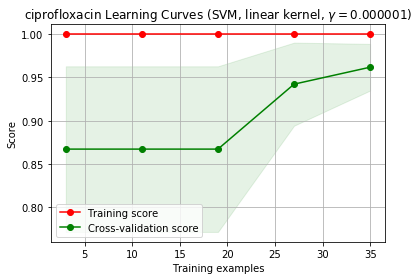

classifier score 0.953703703704


In [18]:
antiToSVM('ciprofloxacin')